In [3]:
# Python >= 3.5 이상을 권장
import sys
assert sys.version_info >= (3,5)

In [4]:
# Scikit-Learn >= 0.20 이상을 권장
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
import os
datapath = os.path.join("datasets", "lifesat", "")

아래의 함수는 OECD의 삶의 만족도(life satisfaction) 데이터와 IMF의 1인당 GDP(GDP per capita)데이터를 합치는 함수임.
책 안에는 포함되어 있지 않음

In [12]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
# 주피터에 그래프를 깔끔하게 그리기 위해
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 14)
mpl.rc('ytick', labelsize = 14)

In [8]:
# 데이터 다운로드
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok = True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

## 본격 예제 코딩

In [9]:
# 예제 코드
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [11]:
# 데이터 적재
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=",", delimiter='\t',
                            encoding = 'latin1', na_values="n/a")

In [13]:
# 데이터 준비
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

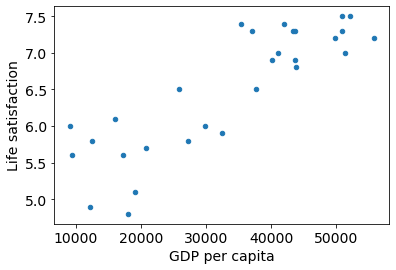

In [14]:
# 데이터 시각화
country_stats.plot(kind='scatter', x="GDP per capita", y = "Life satisfaction")
plt.show()

In [15]:
# 선형 회귀모델 선택
model = sklearn.linear_model.LinearRegression()

In [16]:
# 모델 훈련
model.fit(X, y)

LinearRegression()

In [17]:
# 키프로스에 대한 예측
X_new = [[22587]] # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력

[[5.96242338]]


In [18]:
# 최근접 이웃 모델로 해보기
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors = 3)

# 모델 훈련
model1.fit(X, y)

# 키프로스에 대한 예측을 만들기
print(model.predict(X_new))

[[5.96242338]]


아래의 링크에서 1장에서 그림을 만들기 위한 데이터 처리 등에 대한 코드를 볼 수 있음 
링크 : https://github.com/rickiepark/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb